In [2]:
import pandas as pd
import glob
import numpy as np

# Get all CSV files ending with '_average.csv'
files = glob.glob('*_average.csv')

# Initialize a dictionary to store ranks for each method
method_ranks = {}

# Read each file and extract ranks
for file in files:
    df = pd.read_csv(file)
    for _, row in df.iterrows():
        method = row['Method']
        rank = row['Rank']
        if method not in method_ranks:
            method_ranks[method] = []
        method_ranks[method].append(rank)

# Compute mean and standard deviation of ranks
results = []
for method, ranks in method_ranks.items():
    mean_rank = np.mean(ranks)
    std_rank = np.std(ranks)
    results.append({
        'Method': method,
        'Mean Rank': mean_rank,
        'Std Dev Rank': std_rank
    })

# Create a DataFrame with the results
result_df = pd.DataFrame(results)

# Sort the DataFrame by Mean Rank
result_df = result_df.sort_values('Mean Rank')

# Display the results
print(result_df)


           Method  Mean Rank  Std Dev Rank
0           SMOTE        2.0      0.894427
2            TVAE        2.0      1.095445
1        Original        2.6      0.489898
3    DecisionTree        4.0      1.949359
6  GaussianCopula        5.7      0.900000
4       CopulaGAN        6.5      1.431782
5           CTGAN        6.5      1.360147
7      MonteCarlo        6.7      0.781025


In [3]:
import pandas as pd
import glob
import numpy as np

# Get all CSV files ending with '_average.csv'
files = glob.glob('*_average.csv')

# Initialize dictionaries to store ranks and CV Means for each method
method_ranks = {}
method_cv_means = {}

# Read each file and extract ranks and CV Means
for file in files:
    df = pd.read_csv(file)
    for _, row in df.iterrows():
        method = row['Method']
        rank = row['Rank']
        cv_mean = row['CV Mean']
        
        if method not in method_ranks:
            method_ranks[method] = []
            method_cv_means[method] = []
        
        method_ranks[method].append(rank)
        method_cv_means[method].append(cv_mean)

# Compute mean and standard deviation of ranks, and mean of CV Means
results = []
for method in method_ranks:
    ranks = method_ranks[method]
    cv_means = method_cv_means[method]
    
    mean_rank = np.mean(ranks)
    std_rank = np.std(ranks)
    mean_cv_mean = np.mean(cv_means)
    
    results.append({
        'Method': method,
        'Mean Rank': mean_rank,
        'Std Dev Rank': std_rank,
        'Mean CV Accuracy': mean_cv_mean
    })

# Create a DataFrame with the results
result_df = pd.DataFrame(results)

# Sort the DataFrame by Mean Rank
result_df = result_df.sort_values('Mean Rank')

# Display the results
print(result_df)

           Method  Mean Rank  Std Dev Rank  Mean CV Accuracy
0           SMOTE        2.0      0.894427          0.844425
2            TVAE        2.0      1.095445          0.859189
1        Original        2.6      0.489898          0.823260
3    DecisionTree        4.0      1.949359          0.745656
6  GaussianCopula        5.7      0.900000          0.606544
4       CopulaGAN        6.5      1.431782          0.598154
5           CTGAN        6.5      1.360147          0.588201
7      MonteCarlo        6.7      0.781025          0.563570


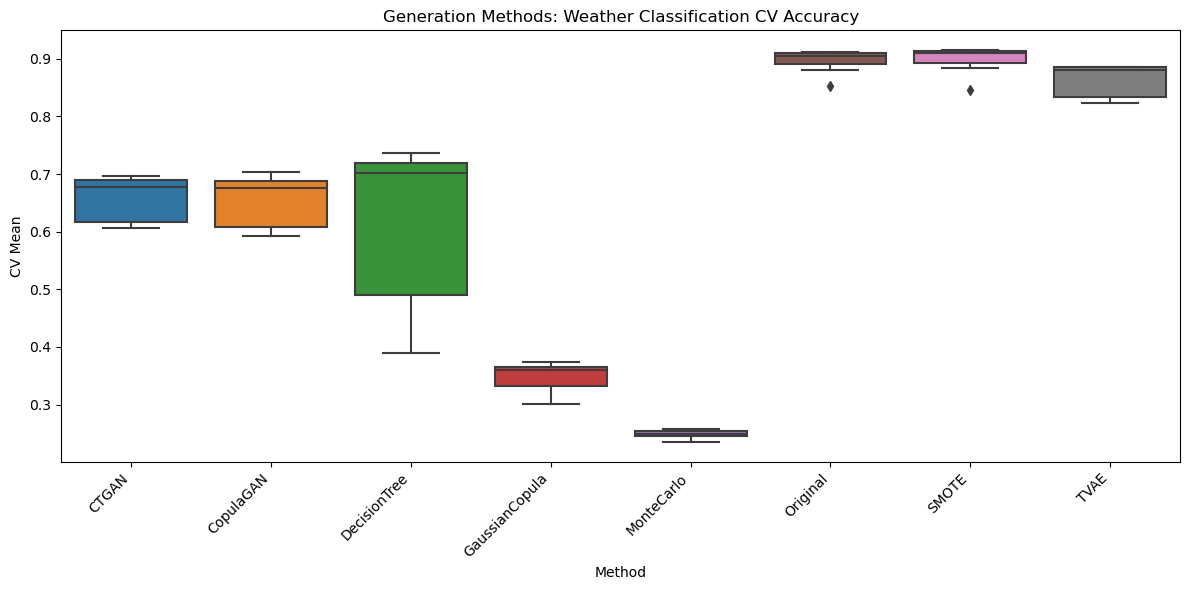

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_prefix = "weather"  # Change this to any word you like
df =  pd.read_csv(f'{file_prefix}_compared.csv')

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Method', y='CV Mean', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Method')
plt.ylabel('CV Mean')
plt.title('Generation Methods: Weather Classification CV Accuracy')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()


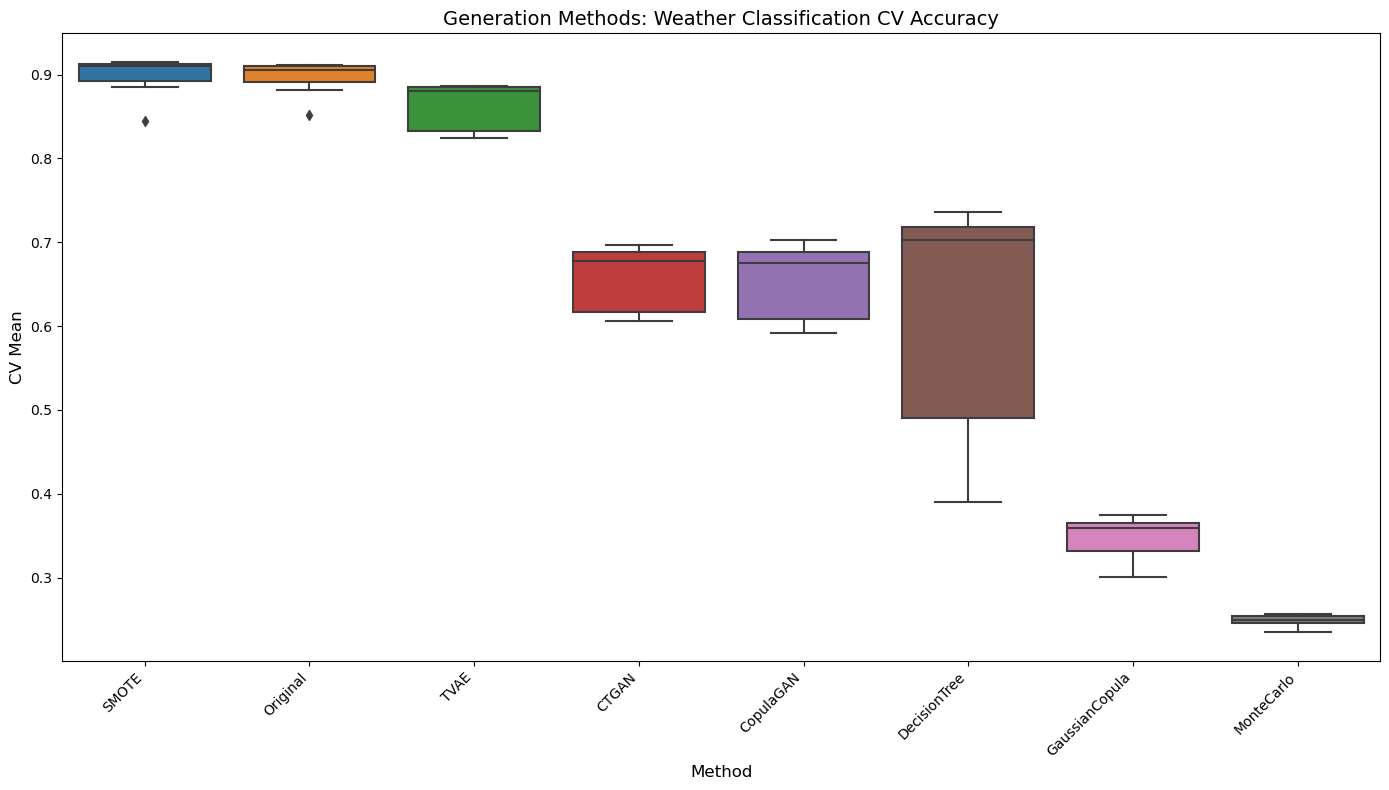

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_prefix = "weather"  # Change this to any word you like
df = pd.read_csv(f'{file_prefix}_compared.csv')

# Calculate the mean CV Mean for each method
method_means = df.groupby('Method')['CV Mean'].mean().sort_values(ascending=False)

# Create a custom order based on the mean CV Mean scores
custom_order = method_means.index

# Create the boxplot with custom order
plt.figure(figsize=(14, 8))
sns.boxplot(x='Method', y='CV Mean', data=df, order=custom_order)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Method', fontsize=12)
plt.ylabel('CV Mean', fontsize=12)
plt.title('Generation Methods: Weather Classification CV Accuracy', fontsize=14)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()